In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline  

In [2]:
data=pd.read_csv('SalesData.csv')
data.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [3]:
data.shape

(3709, 14)

In [4]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [5]:
# As the number of not null columns is equal to total rows so here we have not null values 

In [6]:
# to get the statistical summary of numeric data
data.describe()

,AccountId,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
count,3.709000e+03,3709.000000,3709.000000,3709.000000,3709.00000,3709.000000,3709.000000
mean,7.716535e+04,6134.912371,7998.039527,2.293567,3.00791,1.067396,1.242354
std,2.417615e+05,9195.070153,11130.551032,3.659052,4.31373,0.211269,0.192727
min,1.116000e+03,-11053.440000,-59090.810000,-3.000000,-17.00000,0.700000,0.910000
25%,3.774000e+03,0.000000,1886.690000,0.000000,1.00000,0.880000,1.080000
50%,6.500000e+03,3128.340000,3918.770000,1.000000,1.83330,1.070000,1.240000
75%,1.041900e+04,7837.540000,10122.400000,3.000000,4.00000,1.250000,1.410000
max,1.219499e+06,145760.120000,168033.360000,53.000000,61.00000,1.420000,1.570000


In [7]:
# get the summary of categorical data
data[['AccountName','Region','Division','City','State','Tier','Month']].describe().T

,count,unique,top,freq
AccountName,3709,2293,Account98,12
Region,3709,3,Central,1374
Division,3709,26,HAILSTORM,206
City,3709,203,FAYETTEVILLE,40
State,3709,44,TX,333
Tier,3709,4,High,1984
Month,3709,12,Jan,328


In [8]:
data.nunique()

AccountId             2292
AccountName           2293
Region                   3
Division                26
City                   203
State                   44
Tier                     4
Month                   12
Sales2015             1033
Sales2016             1096
Units2015              133
Units2016              142
TargetAchevied2015      73
TargetAchevied2016      67
dtype: int64

In [9]:
print( data['Region'].value_counts())
print('\n', data['Tier'].value_counts())                

Region
Central    1374
East       1336
West        999
Name: count, dtype: int64

 Tier
High    1984
Med     1057
Low      642
Out       26
Name: count, dtype: int64


In [10]:
#check duplicates
data.duplicated().sum()

0

In [11]:
data.columns

Index(['AccountId', 'AccountName', 'Region', 'Division', 'City', 'State',
       'Tier', 'Month', 'Sales2015', 'Sales2016', 'Units2015', 'Units2016',
       'TargetAchevied2015', 'TargetAchevied2016'],
      dtype='object')

,Region,Sales2015,Sales2016
0,Central,7891728.86,9787808.73
1,East,9512916.49,12667230.45
2,West,5349744.64,7209689.43


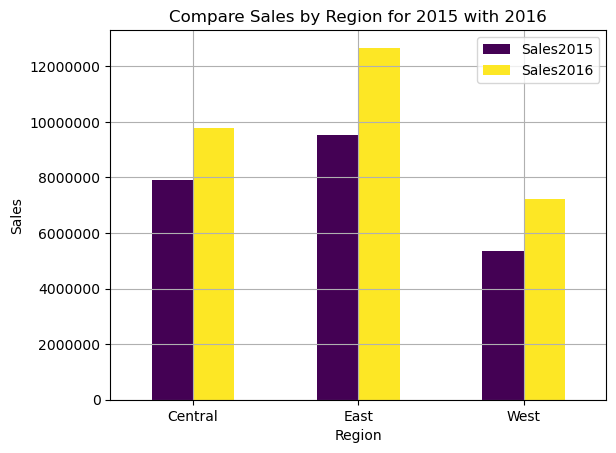

In [12]:
# 1. Compare Sales by region for 2016 with 2015 using bar chart 
region_sales = data.groupby('Region')[['Sales2015', 'Sales2016']].sum().round(2).reset_index()
display(region_sales)
region_sales.plot(x = 'Region', kind='bar', title = 'Compare Sales by Region for 2015 with 2016',colormap='viridis', ylabel='Sales')
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

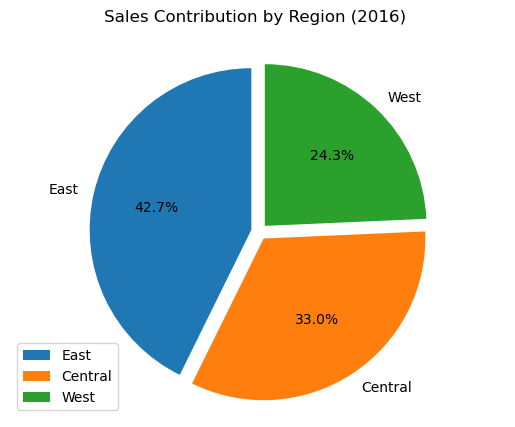

In [13]:
#2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart
region_sales2016 = data.groupby('Region')['Sales2016'].sum().round(2).reset_index(name='Total_Sales').sort_values(by='Total_Sales',ascending = False)
explode = [0.05] * len(region_sales2016)  # slight separation for 3D effect
plt.pie(region_sales2016['Total_Sales'], labels = region_sales2016['Region'], autopct='%1.1f%%', startangle=90, explode = explode)
plt.title('Sales Contribution by Region (2016) \n')
plt.legend(region_sales2016['Region'],loc = 'lower left')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


Sales2015                           Sales2016                        
Region     Central        East        West     Central        East        West
Tier                                                                          
High    4798698.43  6102946.12  2944789.26  6026042.94  7817151.10  3768038.35
Low      943439.67   901665.80   671064.38  1132832.85  1144929.59  1099502.18
Med     2068225.87  2470998.02  1718475.92  2632181.47  3705149.76  2342148.90
Out       81364.89    37306.55    15415.08        0.00        0.00        0.00

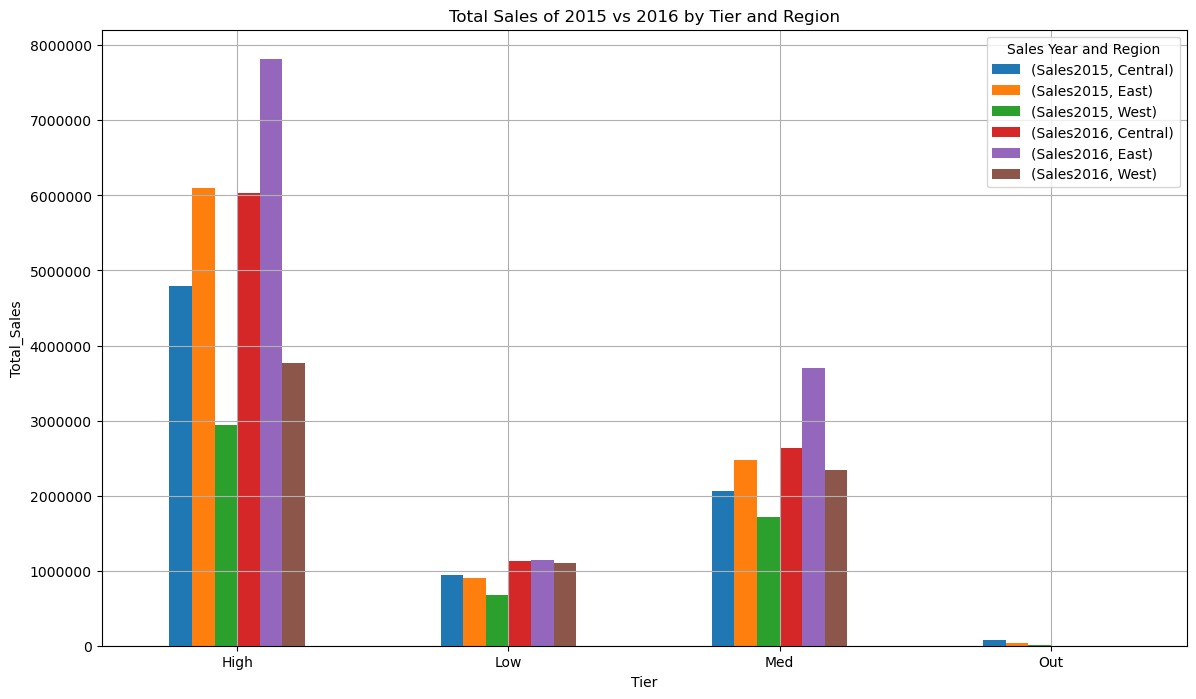

In [14]:
#3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers 
#mthod 1 
sales_2015_vs_2016 = data.groupby(['Tier','Region'])[['Sales2015', 'Sales2016']].sum().unstack().round(2) 
sales_2015_vs_2016[sales_2015_vs_2016 < 0] = 0
display(sales_2015_vs_2016)
sales_2015_vs_2016.plot(kind='bar', figsize=(14, 8),title='Total Sales of 2015 vs 2016 by Tier and Region',xlabel='Tier',ylabel='Total_Sales')
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain',axis='y')
plt.legend(title='Sales Year and Region')
plt.grid(True)
plt.show()

,Region,Tier,Year,Total Sales
0,Central,High,2015,4798698.43
1,Central,Low,2015,943439.67
2,Central,Med,2015,2068225.87
3,Central,Out,2015,81364.89
4,East,High,2015,6102946.12
5,East,Low,2015,901665.80
6,East,Med,2015,2470998.02
7,East,Out,2015,37306.55
8,West,High,2015,2944789.26
9,West,Low,2015,671064.38


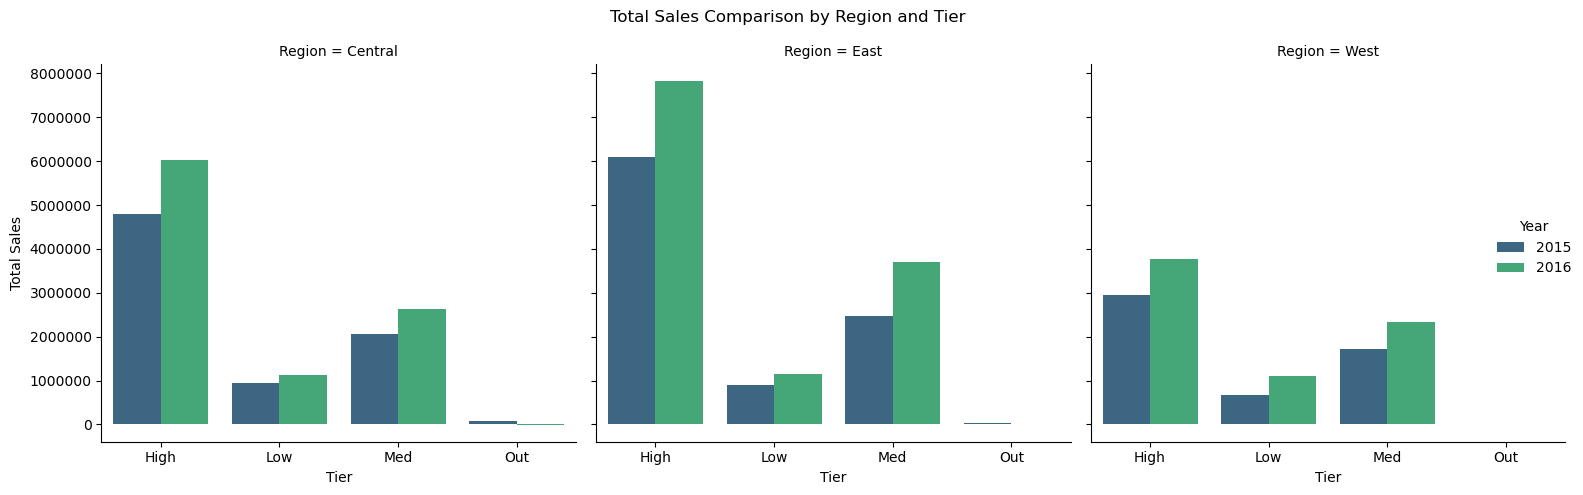

In [33]:
# method 2 
sales_comparison = data.groupby(['Region', 'Tier'])[['Sales2015', 'Sales2016']].sum().reset_index()

sales_melted = sales_comparison.melt(id_vars=['Region', 'Tier'], var_name='Year', value_name='Total Sales').round(2)
# Change 'Sales2015' to '2015' for a cleaner legend
sales_melted['Year'] = sales_melted['Year'].str.replace('Sales', '')
display(sales_melted)

#Create the plot using Seaborn's catplot for faceting
g = sns.catplot(data=sales_melted,kind='bar',x='Tier',y='Total Sales',hue='Year',
                col='Region',  # Create separate columns for each Region
                palette='viridis')

g.fig.suptitle('Total Sales Comparison by Region and Tier')
g.set_axis_labels("Tier", "Total Sales")
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

,State,Sales2015,Sales2016,Decline
0,CT,197202.790,323502.31,False
1,DC,216723.950,257421.69,False
2,FL,1660162.000,2508232.28,False
3,GA,681546.460,946919.77,False
4,MA,419278.750,687096.45,False
5,MD,527309.060,750008.79,False
6,ME,77425.640,183673.05,False
7,NC,1292801.640,1610521.00,False
8,NH,136419.380,144717.51,False
9,NJ,520419.290,782289.19,False



 In East region,state which is registered a decline in 2016 as compared to 2015 is:  ['NY'] 
 



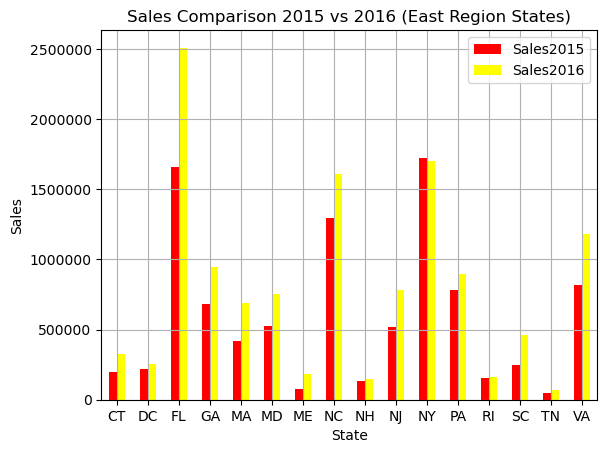

In [16]:
# 4. In East region, which state registered a decline in 2016 as compared to 2015? 
east_totals = data[data['Region'] == 'East'].groupby('State')[['Sales2015','Sales2016']].sum().reset_index()
east_totals['Decline'] = east_totals['Sales2015']>east_totals['Sales2016']
decline_states = east_totals[east_totals['Decline']==True].State.to_list()
display(east_totals)
print('\n In East region,state which is registered a decline in 2016 as compared to 2015 is: ', decline_states,'\n \n')

east_totals[['State','Sales2015','Sales2016']].plot(x='State',kind='bar', title='Sales Comparison 2015 vs 2016 (East Region States)',colormap = 'autumn',ylabel='Sales')
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=0)
plt.grid(visible=True)
plt.show()

,Division,Units2015,Units2016,Decline
0,BIG APPLE,180.8330,231.0000,False
1,CHARGERS,123.6666,164.4999,False
2,CONGRESSIONAL,164.5003,205.0000,False
3,DIAMONDBACK,153.3334,176.6667,False
4,EMPIRE,414.3332,449.3332,False
5,GRIDIRON,213.6673,246.1675,False
6,GULF STREAM,185.0000,301.0009,False
7,HAILSTORM,187.8338,247.0003,False
8,KINETIC,214.3334,244.5001,False
9,MINUTEMEN,215.0000,267.5000,False



 decline_divisions : 0


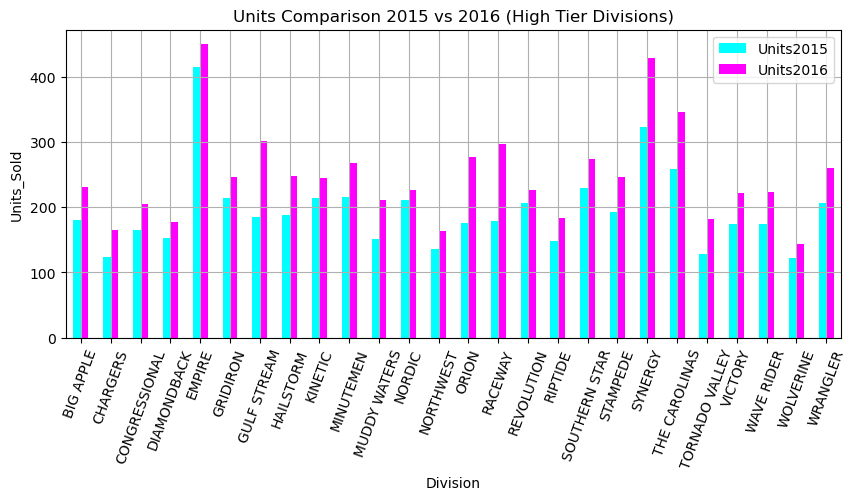

In [17]:
# 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015? 

high_tier = data[data['Tier'] == 'High']
division_units = high_tier.groupby('Division')[['Units2015','Units2016']].sum().reset_index()
division_units['Decline'] = division_units['Units2015']>division_units['Units2016']
display(division_units)
decline_divisions = division_units.loc[division_units['Decline']==True,'Decline'].count()
print('\n decline_divisions :',decline_divisions)
 
# Mistake that i was doing initially "data.loc[(data['Tier'] == 'High') & (data['Units2015'] > data['Units2016']),'Division'].unique()" 
# but here there are duplicates or many divisions present in data so we get wrong result before
division_units[['Division','Units2015','Units2016']].plot(x='Division',kind='bar',colormap = 'cool',figsize=(10,4),title = 'Units Comparison 2015 vs 2016 (High Tier Divisions)',ylabel='Units_Sold')
plt.xticks
plt.grid(visible=True)
plt.xticks(rotation=70)
plt.show()

In [18]:
# 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
#    Jan - Mar : Q1 
#    Apr - Jun : Q2 
#    Jul - Sep : Q3 
#    Oct - Dec : Q4   

In [19]:
data['Qtr'] = np.where(data['Month'].isin(['Jan','Feb','Mar']),'Q1',
                       np.where(data['Month'].isin(['Apr','May','Jun']),'Q2',
                                np.where(data['Month'].isin(['Jul','Aug','Sep']),'Q3','Q4')))
               
data   
                                        # OR 
#     conditions = [
#                     data['Month'].isin(['Jan','Feb','Mar']),
#                     data['Month'].isin(['Apr','May','Jun']),
#                     data['Month'].isin(['Jul','Aug','Sep']),
#                     data['Month'].isin(['Oct','Nov','Dec']) }
#     
#     choices = ['Q1', 'Q2', 'Q3', 'Q4']
#     
#     data['Qtr'] = np.select(conditions, choices)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


,Qtr,Sales2015,Sales2016
0,Q1,5485800.16,6997953.24
1,Q2,5390862.08,7237361.17
2,Q3,6164093.84,7861546.02
3,Q4,5713633.91,7567868.17


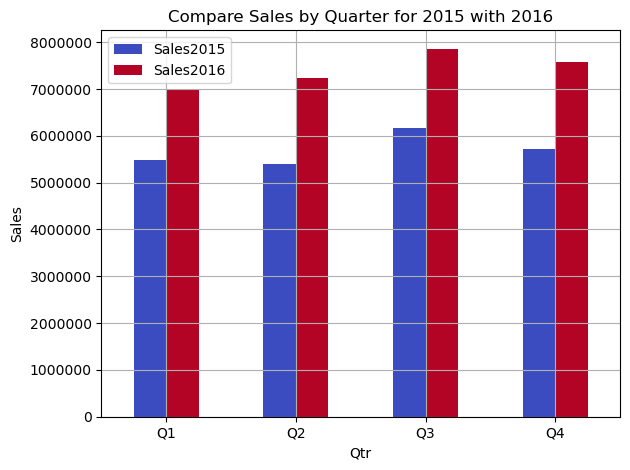

In [20]:
# 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot 
qtr_sales = data.groupby('Qtr')[['Sales2015','Sales2016']].sum().round(2).reset_index()
display(qtr_sales)

qtr_sales.plot(x='Qtr',kind='bar',title = 'Compare Sales by Quarter for 2015 with 2016', ylabel='Sales',colormap='coolwarm')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Tier,High,Low,Med,Out
Qtr,,,,
Q1,3867718.595,948832.77,2.181402e+06,0.0
Q2,4130952.560,890594.75,2.215814e+06,0.0
Q3,4872559.250,795177.71,2.197058e+06,0.0
Q4,4740001.985,742659.39,2.085207e+06,0.0


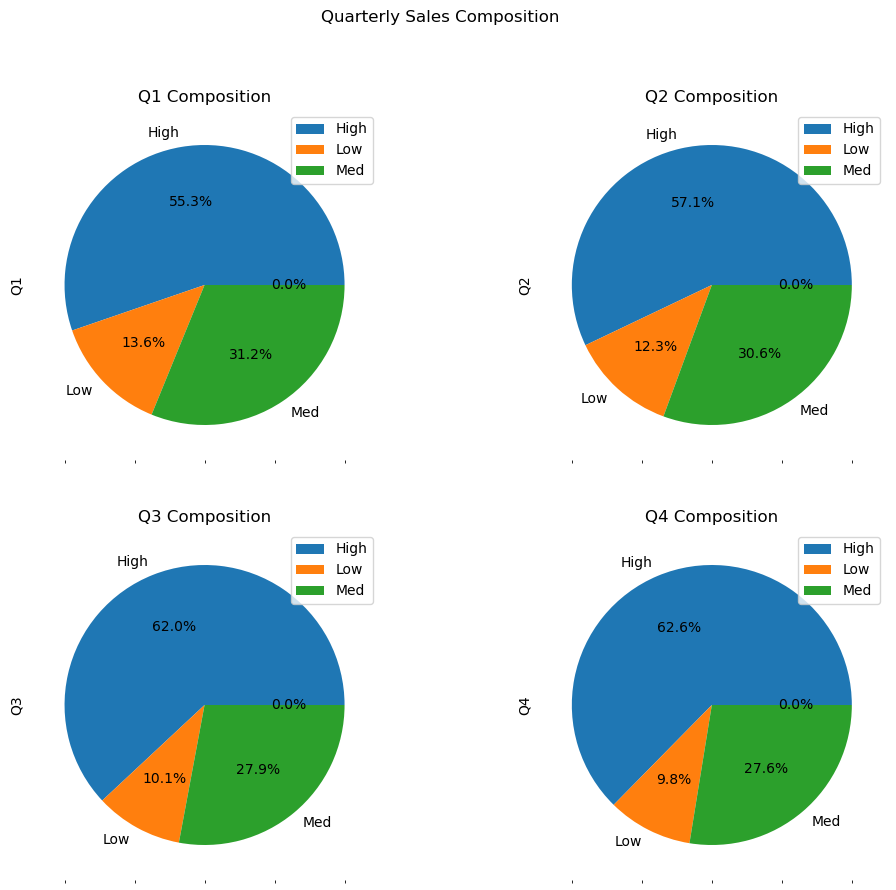

In [21]:
#8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart. 
#  (Draw 4 pie charts representing a Quarter for each Tier)

# method 1

qtr_sales2016 = data.groupby(['Qtr','Tier'])['Sales2016'].sum().unstack().fillna(0)
                                   # or 
#qtr_sales2016 = pd.crosstab(index = data['Qtr'], columns = data['Tier'], values = data['Sales2016'], aggfunc='sum')
qtr_sales2016[qtr_sales2016 < 0] = 0     # because pie chart can't accept negative values
display(qtr_sales2016)

qtr_sales2016.T.plot(kind='pie', subplots=True,figsize=(12, 10),layout=(2, 2),autopct='%1.1f%%',
                     title=['Q1 Composition', 'Q2 Composition', 'Q3 Composition', 'Q4 Composition'] )
plt.suptitle('Quarterly Sales Composition ')
plt.show()

Tier,High,Low,Med,Out
Qtr,,,,
Q1,3867718.60,948832.77,2181401.88,0.0
Q2,4130952.56,890594.75,2215813.86,0.0
Q3,4872559.25,795177.71,2197057.59,0.0
Q4,4740001.99,742659.39,2085206.80,0.0


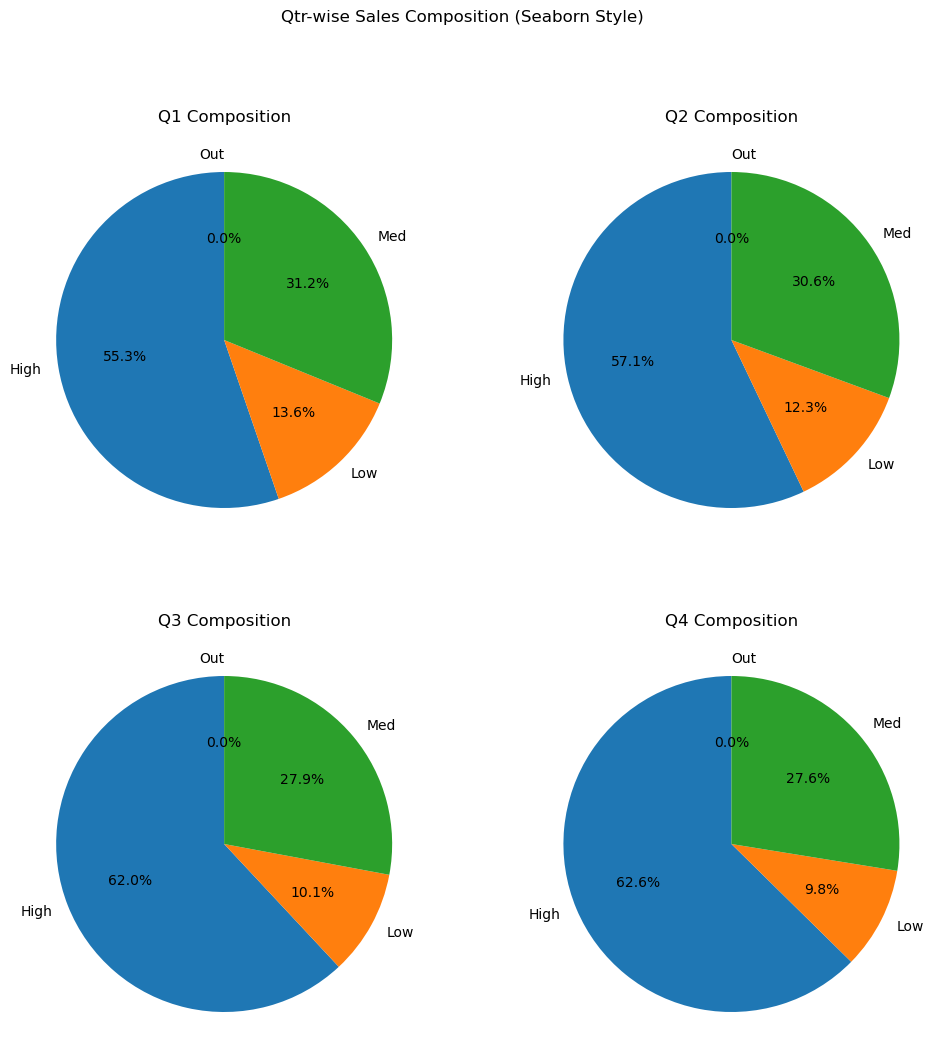

In [22]:
# method 2

qtr_sales2016 = pd.crosstab(index = data['Qtr'], columns = data['Tier'], values = data['Sales2016'], aggfunc='sum').round(2)
qtr_sales2016[qtr_sales2016 < 0] = 0 
display(qtr_sales2016)

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Qtr-wise Sales Composition (Seaborn Style)')

q1_data = qtr_sales2016.loc['Q1']
axes[0, 0].pie(q1_data, labels=q1_data.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Q1 Composition')

q2_data = qtr_sales2016.loc['Q2']
axes[0, 1].pie(q2_data, labels=q2_data.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Q2 Composition')

q3_data = qtr_sales2016.loc['Q3']
axes[1, 0].pie(q3_data, labels=q3_data.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Q3 Composition')

q4_data = qtr_sales2016.loc['Q4']
axes[1, 1].pie(q4_data, labels=q4_data.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Q4 Composition')

plt.show()
